In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)



In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
last_date = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
last_date 


datetime.date(2016, 8, 23)

In [35]:
# Perform a query to retrieve the data and precipitation scores
result= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date).all()
result

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [36]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(result, columns= ["Date", "Precipitation"] )
df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [37]:
# Sort the dataframe by date
df1= df.sort_values("Date")
df1

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


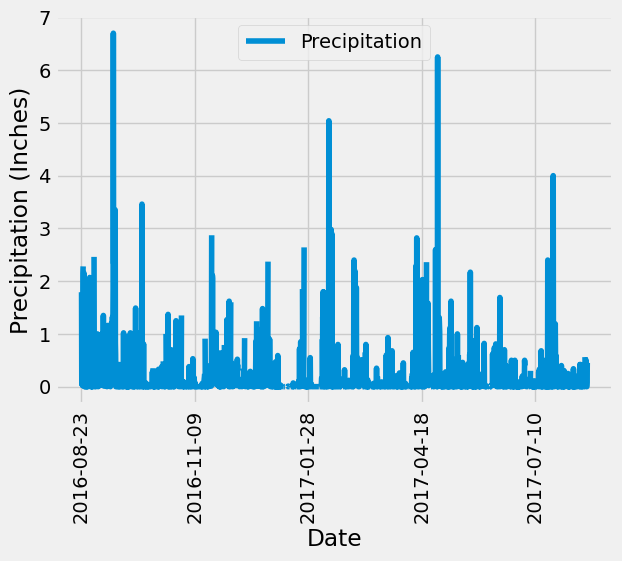

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
df1.plot(x="Date", y="Precipitation")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.grid
plt.legend(loc="upper center")
plt.show()

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stat= df.describe()
summary_stat

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [43]:
# Using the most active station id, Query the last 12 months of temperature observation data for this station

temp_obs = session.query(Measurement.tobs).filter(Measurement.date >= last_date, Measurement.station == 'USC00519281').order_by(Measurement.tobs).all()
print(temp_obs)



[(59.0,), (59.0,), (59.0,), (60.0,), (60.0,), (61.0,), (62.0,), (62.0,), (62.0,), (62.0,), (62.0,), (62.0,), (63.0,), (63.0,), (63.0,), (63.0,), (64.0,), (64.0,), (64.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (66.0,), (66.0,), (66.0,), (66.0,), (66.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), 

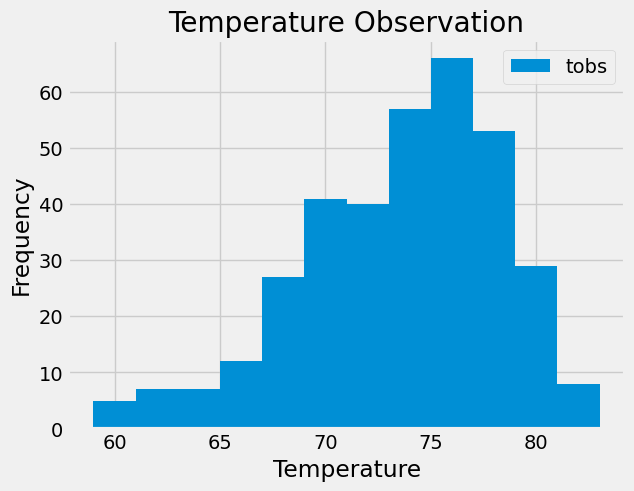

In [44]:
# and plot the results as a histogram
df1 = pd.DataFrame(temp_obs)
df1.hist( bins = 12, label= 'tobs')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.title('Temperature Observation')
plt.show()

# Close Session

In [45]:
# Close Session
session.close()